NAME: MARCON Adèle

# INF TC1 - TD7bis (2h + 2h AUTO) - Rendu du Rendu de monnaie

---

## Objectif du TD

Dans ce rendu de TD est d'aborder le problème de rendu de monnaie selon la méthode de **Programmation Dynamique**.

**Vos réponses à ce TD fera l'objet d'un rendu à [déposer sur Moodle](https://pedagogie1.ec-lyon.fr/course/view.php?id=1865).**

## Modalités de rendu du TD

Le rendu sera à déposer sur Moodle une (1) semaine après le dernier TD d'autonomie. Il pourra être réalisé seul ou en binôme. Ce rendu devra comporter :

- Les réponses aux questions de la partie 3 sous forme de notebook ou autre document.

- Un code fonctionnel et les tests appropriés (avec `assert` par exemple) sous forme de notebook ou de fichier Pythons classiques.
  
- De **nombreux** tests avec plusieurs systèmes de monnaies (canoniques et non canoniques) démontrant l'efficacité de votre approche. **Pensez également à inclure des tests démontrant les limites des solutions que vous proposez.** Pensez à rajouter les types de variables et commentaires dans les fonctions.

- La description de parties de code difficiles (dans le code ou dans des cellules supplémentaires).

- Tout soucis ou point bloquant dans votre code.

- Les diagrammes, exemples et illustration nécessaires (dans ce cas vous devrez créer une archive comprenant les fichiers de code, notebook et les fichiers d'illustration).

- Tout élément et exemple supplémentaire que vous jugerez nécessaires.

- Les réponses à la partie 4.

NOM(s) et PRENOM(s) : MARCON Adèle

Groupe de TD : C1a

## Rappel: Le problème de "rendu de monnaie"

Le problème de rendu de monnaie est très fréquent dans la vie de tous les jours et peut être défini comme suit : étant donné un montant, une machine capable de rendre la monnaie doit rendre ce montant au client à partir de pièces (1c à 2€) et de billets. On suppose pour simplifier qu'il n'y a que des pièces en centimes; un billet de 5€ sera représenté comme une pièce de 500 centimes. On supposera dans un premier temps qu'il existe un nombre suffisant (autant que nécessaire) de chaque pièce, mais dans un second temps nous introduirons des contraintes de disponibilité des pièces.

|               | **la table S**         | **la table D**                   |
|---------------|------------------------|----------------------------------|
| **indice $i$**| **Valeur ($v_i$)**     | **Disponibilité ($d_i$)**        |
| 1             | 1c                     | nombre de pièces de 1c disponibles |
| 2             | 2c                     | nombre de pièces de 2c disponibles |
| 3             | 5c                     | ...                              |
| 4             | 10c                    | ...                              |
| 5             | 20c                    | ...                              |
| 6             | 50c                    | ...                              |
| 7             | 100 (1€)               | pièces de 1€                      |
| 8             | 200 (2€)               | pièces de 2€                      |
| 9             | 500 (5€)               | billets de 5€                     |
| 10            | 1000                   | billets de 10€                    |
| 11            | 2000                   | billets de 20€                    |
| 12            | 5000                   | billets de 50€                    |
| 13            | 10000                  | billets de 100€                   |


De manière plus formelle, un stock de pièces est un tuple $S=(v_1, v_2, ..., v_n)$ où l'entier $v_i > 0$ est la valeur de la $i^{ème}$ pièce. Pour refléter le fait qu'on a des pièces de 1, 2 et 5c, $S$ contiendra $v_1=1$ (1 centime), $v_2=2, v_3=5$. Le problème de monnaie est un problème d'optimisation combinatoire $(S,M)$ permettant de trouver le tuple $T=(x_1, x_2, ..., x_n)$ avec $x_i \geq 0$ qui minimise $ \sum_{i=1}^n x_i$ sous la contrainte $\sum_{i=1}^n x_i.v_i = M$. Autrement dit, nous souhaitons aussi bien obtenir le montant exact, que minimiser le nombre total de pièces $x_i$ de valeur $v_i$ utilisées. Appelons $Q(S,M) = \sum_{i=1}^n x_i$ la quantité de pièces à rendre pour le montant *M* étant donné le système *S* décrit dans la Table~1. Une solution optimale $Q_{opt}$ à ce problème est telle que *Q(S,M)* soit minimale :

$Q_{opt}(S,M) = min \ \sum_{i=1}^n x_i$.

Dans certaines situations il faudra gérer le nombre de pièces/billets disponibles (la table *D*). Nous noterons *d[i]=k* pour dire : il y a *k* pièces/billets du montant *$v_i$* disponibles (pièces ou billets du montant *v[i]*) à l'indice *i* dans la table *S*. On supposera cependant dans un premier temps qu'il y a un nombre suffisant de chaque pièce/billet dans le tableau S. On supposera également que *S* est ordonné dans un ordre croissant.


## Exemples

**M = 9€:** étant donné S dans la Table ci-dessous, la solution qui minimise le nombre total de pièces rendues à 3 est *T=(0,0,0,0,0,0,0,2,1,0,0,0,0)*. Donc, $Q_{opt}(S,9) = \min \ Q(S,9) = 3$. Détails (avec des pièces $\geq$ 1€) :


| Description                                            | T                                      | Rendu                                      | 
|--------------------------------------------------------|----------------------------------------|---------------------------------------------|
| 9 pièces de 1€ et 0 pour toutes les autres            | T=(0,0,0,0,0,0,0,9,0,0,0...0)          | $\rightarrow$ 9 pièces                      | $Q(S,9) =9$  |
| $\circ$ 5 $\times$ 1€ + 2 $\times$ 2€, 0 pour les autres | T=(0,0,0,0,0,0,0,5,2,0,0...0)       | $\rightarrow$ 7 pièces                      | $Q(S,9) =7$  |
| $\circ$ 1 $\times$ 1€ + 4 $\times$ 2€, 0 pour les autres | T=(0,0,0,0,0,0,0,1,4,0,0...0)       | $\rightarrow$ 5 pièces                      | $Q(S,9) =5$  |
| $\circ$ 2 $\times$ 2€ + 1 $\times$ 5€, 0 pour les autres | T=(0,0,0,0,0,0,0,0,2,1,0...0)       | $\rightarrow$ 3 pièces                      | **$Q(S,9) =3$** |
| $\circ$ 3 $\times$ 1 + 3 $\times$ 2, 0 pour les autres  | T=(0,0,0,0,0,0,0,3,3,0,0...0)       | $\rightarrow$ 6 pièces                      |              |
| $\circ$ 4 $\times$ 1 + 1 $\times$ 5, 0 pour les autres  | T=(0,0,0,0,0,0,0,4,0,1,0...0)       | $\rightarrow$ 5 pièces                      |              |
| $\circ$ etc. sans parler des solutions avec des centimes ! |                                  |                                             |              |
<center>
    <i>Table 1</i>
</center>

**M = 1989€:** pour rendre la somme de 1989€ pièces (sans les centimes), on aura : $1989 = 500 \times 3 + 488 = 500 \times 3 + 200 \times 2 + 50 \times 1 + 20 \times 1 + 10 \times 1 + 5 \times 1 + 2 \times 2$, soit $3+2+1+1+1 = 8$ grosses pièces (billets) et $1+2 = 3$ pièces.


## 3. Algorithme de Programmation Dynamique (Rendu du TD)

Nous introduisons une troisième et dernière méthode de résolution qui se base sur la programmation dynamique dont les principes sont :

1) identifier une formule récursive pour résoudre le problème de façon incrémentale, 
2) résoudre le problème pour des conditions aux bords,
3) itérer pour résoudre le problème complet. 

Supposons que l'on puisse, pour le montant *M*, savoir calculer une solution optimale pour tout montant $M' < M$. Pour satisfaire *M*, il faudra alors prendre une (seule) pièce $v_i$ supplémentaire parmi les *n* pièces disponibles. Une fois cette pièce choisie, le reste $M' = M-v_i$  est forcément inférieur à *M* et on sait qu'on peut calculer un nombre optimal de pièces pour *M'*. Par conséquent :  


$Q_{opt}(i,m) = min
\begin{cases}
  1 + Q_{opt}(i, m - v_i) \quad si \ (m - v_i) \geq 0  \qquad \text{ on utilise une pièce de type i de 
  valeur }v_i\\
Q_{opt}(i-1, m) \qquad \quad    si \ i \geq 1 \qquad \qquad \quad \text{ on n'utilise pas la pièce de type i, 
essayons i-1}
\end{cases}$


L'inconvénient de cette méthode est que chaque appel à $Q_{opt}$ fait deux appels à lui-même, donc le nombre d'opérations nécessaires est exponentiel à la taille de *M*. Pour éviter cela ferons appel au principe de *mémoïsation* de la programmation dynamique, en stockant les résultats intermédiaires dans une matrice `mat[|S|][M]` (Figure 2).

<center>
<img src="monnaie-progdyn.png" alt="Image originale" style="height:5cm;">
</center>
<center>
    <i>Figure 2</i>
</center>
    
Illustration de la résolution par programmation dynamique. L'ordre de remplissage des cellules (de haut en bas, de gauche à droite) est représenté en vert.

Les colonnes de la matrice sont les valeurs de M qu'on doit atteindre. Les lignes sont les pièces dont on dispose pour atteindre chaque valeur de M. En première ligne, on ne dispose d'aucune pièce, en ligne 2 on dispose d'une infinité de pièces de 1c, en ligne 3 on dispose d'une infinité de pièces de 1c et de 3c, etc. Les cellules de la matrice indiquent le nombre minimal de pièces à utiliser parmi celles autorisées par la ligne courante, pour atteindre la valeur en colonne. Ainsi on peut lire dans la matrice que pour payer 6 centimes avec des pièces de 1, 3 et 4 il faut utiliser 2 pièces (2 $\times$ 3c). Le remplissage de chaque cellule se fait en calculant le minimum de deux voisins (illustrés avec des flèches rouges). Si un voisin est hors de la matrice, il ne compte pas dans le calcul du minimum. Le pseudo-code de construction de la matrice peut s'écrire de la façon suivante :

```
fonction Progdyn(S, M) : S est le stock des pièces, M est le montant
    soit mat la matrice d'indices [0, |S|] x [0 , M]
    pour i = 0 à |S| faire
      pour m = 0 à M faire
        si m = 0 alors
          mat[i][m] = 0
        sinon si i = 0 alors
          mat[i][m] = infini
        sinon
          mat[i][m] = min(
            si m - S[i-1] >= 0 alors 1 + mat[i][m - S[i-1]] sinon infini
            si i >= 1 alors mat[i-1][m] sinon infini
            )
    renvoyer mat [|S|][M]
```

**Question 3.1 -** Proposer une solution Python de cette méthode. Dans une première étape, trouver simplement le nombre minimal de pièces. Renvoyer `None` si il n'existe pas de solution possible.

In [116]:
def progdyn(S,M):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)]
    for i in range(len(S)+1):
        for m in range(M+1):
            if m == 0:
                mat[i][m] = 0
            elif i == 0:
                mat[i][m] = float('inf')
            else:
                a,b = float('inf'),float('inf')
                if m - S[i-1] >= 0:
                    a = 1 + mat[i][m-S[i-1]]
                if i>= 1:
                    b = mat[i-1][m]
                mat[i][m] = min(a,b)
    return mat[len(S)][M]

In [117]:
assert progdyn([1,3,4],5) == 2
assert progdyn([1,3],5) == 3
assert progdyn([1,3,4],7) == 2


**Question 3.2 -** Modifier votre solution pour renvoyer également les pièces utilisées.

In [118]:
def progdyn2(S,M):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)]
    memoire = {}
    for i in range(len(S)+1):
        for m in range(M+1):
            if m == 0:
                mat[i][m] = 0
                memoire[f'{i},{m}'] = []
            elif i == 0:
                mat[i][m] = float('inf')
                memoire[f'{i},{m}'] = []
            else:
                a,b = float('inf'),float('inf')
                if m - S[i-1] >= 0:
                    a = 1 + mat[i][m-S[i-1]]
                if i>= 1:
                    b = mat[i-1][m]
                mat[i][m] = min(a,b)
                if min(a,b) == a:
                    memoire[f'{i},{m}'] = memoire[f'{i},{m-S[i-1]}'].copy()
                    memoire[f'{i},{m}'].append(S[i-1])
                else:
                    memoire[f'{i},{m}'] = memoire[f'{i-1},{m}'].copy()

    return mat[len(S)][M], memoire[f'{len(S)},{M}']

In [119]:
assert progdyn2([1,3,4],7) == (2,[3,4])
assert progdyn2([1,3,4],3) == (1,[3])

**Question 3.3 -** On souhaite à présent implémenter en Programmation Dynamique la limite du stock de pièces présentée pour les exercices 1.2 et 1.3. Pour ce faire on modifie la formule de $Q_{opt}$ donnée précédemment (valable ici uniquement pour $i\geq1$) :

$Q_{opt}(i,m) = min
\begin{cases}
Q_{opt}(i-1, m) \qquad \qquad \qquad \qquad \qquad \qquad \qquad \text{ on n'utilise aucune pièce de type i}\\
1 + Q_{opt}(i-1, m-v_i) \quad si\ d_i\geq1\ et\ (m-v_i) \geq 0  \qquad \text{ on utilise 1 pièce de type i}\\
2 + Q_{opt}(i-1, m-2v_i) \quad si\ d_i\geq2\ et\ (m-2v_i) \geq 0  \quad \text{ on utilise 2 pièces de type i}\\
3 + Q_{opt}(i-1, m-3v_i) \quad si\ d_i\geq3\ et\ (m-3v_i) \geq 0  \quad \text{ on utilise 3 pièces de type i}\\
...
\end{cases}
$

Implémentez la limite de pièces avec cette nouvelle formule pour l'algorithme en Programmation Dynamique. Notez ici qu'on ne va plus chercher les valeurs sur la même ligne dans la matrice, mais qu'on remonte _systématiquement_ d'une ligne, pour qu'après l'utilisation de $k$ pièces de valeur $v_i$, on ne puisse plus ajouter d'autres pièces de cette même valeur.

In [120]:
def progdyn3(S,M,D):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)]
    for i in range(len(S)+1):
        for m in range(M+1):
            if m == 0:
                mat[i][m] = 0
            elif i == 0:
                mat[i][m] = float('inf')
            else:
                for k in range (1,D[i-1] + 1):
                    v = mat[i-1][m]
                    a = float('inf')
                    if m >= k*S[i-1]:
                        a = k + mat[i-1][m-k*S[i-1]]
                    v = min(a,v)
                mat[i][m] = v
    return mat[len(S)][M]

In [121]:
assert progdyn3([1,3,4],3,[3,0,0]) == 3
assert progdyn3([1,3,4],3,[3,1,1]) == 1

**Question 3.4 -** On dispose à présent du poids de chaque pièce en plus de sa valeur (Table 2), et on cherche à minimiser le poids total des pièces pour atteindre la valeur M. À l'aide d'une matrice analogue à la Figure 2, trouvez le poids minimal pour atteindre la valeur M=7. Notez qu'on ne cherchera plus à minimiser le nombre de pièces utilisées, seul le critère de poids compte pour cet exercice.

| S (valeur de chaque pièce) | P (poids de chaque pièce) |
|---------------------------|---------------------------|
| 1c                        | 2.30g                     |
| 2c                        | 3.06g                     |
| 5c                        | 3.92g                     |
| 10c                       | 4.10g                     |
| 20c                       | 5.74g                     |
| 50c                       | 7.80g                     |
| 100 (1€)                  | 7.50g                     |
| 200 (2€)                  | 8.50g                     |
| 500 (5€)                  | 0.6g                      |
| 1000                      | 0.7g                      |
| 2000                      | 0.8g                      |
| 5000                      | 0.9g                      |
| 10000                     | 1g                        |
<center>
    <i>Table 2</i>
</center>


In [122]:
P = [2.3,3.06,3.92,4.1,5.74,7.8,7.5,8.5,0.6,0.7,0.8,0.9,1]
def progdyn4(S,M,P):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)]
    for i in range(len(S)+1):
        for m in range(M+1):
            if m == 0:
                mat[i][m] = 0
            elif i == 0:
                mat[i][m] = float('inf')
            else:
                a,b = float('inf'),float('inf')
                if P[0]*m - P[i-1] >= 0:
                    a = P[i-1] + mat[i][m-S[i-1]]
                if i>= 1:
                    b = mat[i-1][m]
                mat[i][m] = min(a,b)
    print(mat)
    return mat[len(S)][M]

In [123]:
progdyn4([1,2,5],7,P)

[[0, inf, inf, inf, inf, inf, inf, inf], [0, 2.3, 4.6, 6.8999999999999995, 9.2, 11.5, 13.8, 16.1], [0, 2.3, 3.06, 5.359999999999999, 6.12, 8.42, 9.18, 11.48], [0, 2.3, 3.06, 3.92, 3.92, 3.92, 6.22, 6.98]]


6.98

**Question 3.5 -** Implémentez à présent un algorithme de Programmation Dynamique qui calcule le poids minimal pour atteindre une valeur M. Étant donné qu'avec le système monétaire en Table 2 la minimisation du nombre de pièces minimise aussi le poids, vous pourrez tester votre algorithme avec un système plus complexe tel que donné en Table 3. Essayez par exemple avec la valeur $M=6$.

| S (valeur de chaque pièce) | P (poids de chaque pièce) |
|---------------------------|---------------------------|
| 1c                        | 10g                       |
| 3c                        | 27g                       |
| 4c                        | 32g                       |
| 7c                        | 55g                       |
<center>
    <i>Table 3</i>
</center>

In [124]:
P2 = [10,27,32,55]
S = [1,3,4,7]

progdyn4(S,6,P2)


[[0, inf, inf, inf, inf, inf, inf], [0, 10, 20, 30, 40, 50, 60], [0, 10, 20, 27, 37, 47, 54], [0, 10, 20, 27, 32, 42, 52], [0, 10, 20, 27, 32, 42, 52]]


52

## 4. Étude expérimentale de la complexité


**Question 4.1**  
Donner, en **justifiant**, la complexité **temporelle** et **spatiale** (ordre de grandeur, en notation
$O(\cdot)$) de chacun de ces algorithmes, en fonction de :

- $n$ : le nombre de types de pièces dans le système $S$ ;
- $M$ : le montant à rendre ;


### Algorithme glouton, sans stock limité (TD7, partie 1)
- Complexité temporelle: $O(n)$
- Complexité spatiale: $O(n)$

In [125]:
def gloutonne(S: list, M: int) -> tuple:
    T = [0] * len(S) # O(n)
    for i, piece in enumerate(S): #Boucle s'éxecutant n fois
        T[i] = M // piece #O(1)
        M = M % piece #O(n)
    if M != 0:
        return False, None

    return True, T

### Algorithme d’exploration d’arbre / de graph (TD7, partie 2)
- Complexité temporelle: $O(M.(n+M))$

In [126]:
def exploration(S, M):
    file = [M] # O(1)
    graph = {M: {}} # O(1)          
    while file: # dans le pire des cas: boucle de taille M
        m = file.pop(0) # O(k), k longueur de la file donc dans le pire des cas M
        for piece in S: # boucle de taille n
            if piece <= m: #O(1)
                if m - piece in graph: #O(1)
                    graph[m][m-piece] = piece #O(1)

                else:
                    graph[m - piece] = {} #O(1)
                    graph[m][m-piece] = piece #O(1)             
                    file.append(m-piece) #O(1)

    file = [M]
    parent = {}
    while file: # Au plus M itérations
        m = file.pop(0) # O(M) => il faudrait utiliser deque!!!
        for rem in graph[m]: #au plus n voisins par noeud
            if rem not in parent:
                parent[rem] = m 
                file.append(rem)

        if m == 0:
            break

    chemin = [0]
    while chemin[-1] != M: # Au plus M itérations
        m = chemin[-1]
        chemin.append(parent[m])
    chemin.reverse() # O(M)
    return chemin

- Complexité spatiale: $O(M.n)$

Pour la file (la première et la deuxième): dans le pire des cas complexité en O(M)  
Pour le graphe: dans le pire des cas M noeuds avec n arrêtes donc une complexité en O(M.n)
Pour le chemin: au plus M+1 élements

### Algorithme de programmation dynamique (TD7bis, questions 3.1)

- Complexité temporelle: $O(n.M)$


In [127]:
def progdyn(S,M):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)] # O(n*M)
    for i in range(len(S)+1): # Boucle de taille n
        for m in range(M+1): # Boucle de taille M
            if m == 0:                          # O(1)
                mat[i][m] = 0                   # O(1)
            elif i == 0:                        # O(1)
                mat[i][m] = float('inf')        # O(1)
            else:
                a,b = float('inf'),float('inf') # O(1)
                if m - S[i-1] >= 0:             # O(1)
                    a = 1 + mat[i][m-S[i-1]]    # O(1)
                if i>= 1:                       # O(1)
                    b = mat[i-1][m]             # O(1)
                mat[i][m] = min(a,b)            # O(1)
    return mat[len(S)][M]                       # O(1)

- Complexité spatiale: $O(M.n)$ avec la matrice mat de taille n+1 x M+1

### Algorithme de programmation dynamique (TD7bis, question 3.2)

- Complexité temporelle: $O(M².n)$


In [128]:
def progdyn2(S,M):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)] # O(M.n)
    memoire = {} # O(1)
    for i in range(len(S)+1): # Boucle de taille n
        for m in range(M+1): # Boucle de taille M
            if m == 0:
                mat[i][m] = 0
                memoire[f'{i},{m}'] = []
            elif i == 0:
                mat[i][m] = float('inf')
                memoire[f'{i},{m}'] = []
            else:
                a,b = float('inf'),float('inf')
                if m - S[i-1] >= 0:
                    a = 1 + mat[i][m-S[i-1]]
                if i>= 1:
                    b = mat[i-1][m]
                mat[i][m] = min(a,b)
                if min(a,b) == a:
                    memoire[f'{i},{m}'] = memoire[f'{i},{m-S[i-1]}'].copy() # O(M)
                    memoire[f'{i},{m}'].append(S[i-1])
                else:
                    memoire[f'{i},{m}'] = memoire[f'{i-1},{m}'].copy() # O(M)

    return mat[len(S)][M], memoire[f'{len(S)},{M}']

- Complexité spatiale: $O(M².n)$  
Le dictionnaire mémoire stocke  n.M listes de taille M

**Question 4.2 — Étude expérimentale**

In [129]:
def algo_glouton(S, M):
    T = [0] * len(S)                # O(n)
    for i, piece in enumerate(S):   # Boucle s'éxecutant n fois
        T[i] = M // piece           # O(1)
        M = M % piece               # O(n)
    if M != 0:
        return False, None
    return True, T

def algo_exploration(S, M):
    file = [M] # O(1)
    graph = {M: {}} # O(1)          
    while file: # dans le pire des cas: boucle de taille M
        M = file.pop(0) # O(k), k longueur de la file donc dans le pire des cas M
        for piece in S: # boucle de taille n
            if piece <= M: #O(1)
                if M - piece in graph: #O(1)
                    graph[M][M-piece] = piece #O(1)

                else:
                    graph[M - piece] = {} #O(1)
                    graph[M][M-piece] = piece #O(1)             
                    file.append(M-piece) #O(1)

    file = [M]
    parent = {}
    while file: 
        m = file.pop(0)

        for rem in graph[m]:
            if rem not in parent:
                parent[rem] = m 
                file.append(rem)

        if m == 0:
            break

    chemin = [0]
    while chemin[-1] != M:
        m = chemin[-1]
        chemin.append(parent[m])
    chemin.reverse()
    return chemin

def algo_prog_dyn(S, M):
    mat = [[0 for k in range(M+1)] for k in range(len(S)+1)] # O(n*M)
    for i in range(len(S)+1): # Boucle de taille n
        for m in range(M+1): # Boucle de taille M
            if m == 0:                          # O(1)
                mat[i][m] = 0                   # O(1)
            elif i == 0:                        # O(1)
                mat[i][m] = float('inf')        # O(1)
            else:
                a,b = float('inf'),float('inf') # O(1)
                if m - S[i-1] >= 0:             # O(1)
                    a = 1 + mat[i][m-S[i-1]]    # O(1)
                if i>= 1:                       # O(1)
                    b = mat[i-1][m]             # O(1)
                mat[i][m] = min(a,b)            # O(1)
    return mat[len(S)][M]                       # O(1)

algorithmes = { 
    "Glouton": algo_glouton,
    "Programmation dynamique": algo_prog_dyn,
    "Exploration exhaustive": algo_exploration
    }



In [130]:
from random import randint
A = [1,0,0,0,0,0]
R = 30
for k in range (5):
    A[k+1] += A[k] + randint(1,R)

B = [1,0,0,0,0,0,0]
R = 30
for k in range (6):
    B[k+1] += B[k] + randint(1,R)

systemes = {
    "Non canonique 1": [1, 3, 4],
    "Non canonique 2": [1, 5, 7, 10],
    "Non Canonique 3": [1, 2, 5, 12, 24],
    "Aleatoire 1": A,
    "Aleatoire 2": B,
    "Euro canonique": [1, 2, 5, 10, 20, 50, 100, 200]
    }

In [131]:
import matplotlib.pyplot as plt
import time

def mesurer_temps(fonction, S, M, nb_repetitions=10):
    moy = 0
    for _ in range(nb_repetitions):
        debut = time.perf_counter()
        fonction(S,M)
        fin = time.perf_counter()
        moy += fin - debut
    tps = moy / nb_repetitions
    return tps

print("Mesure des temps d'exécution des algorithmes...")
S = systemes["Non canonique 2"]
M = 10
for nom, fonction in algorithmes.items():
    print(f"  Algorithme : {nom}")
    t = mesurer_temps(fonction, S, M, nb_repetitions=10)
    print (fonction(S,M))
    print(f"    Temps moyen pour M={M} : {t} secondes")


Mesure des temps d'exécution des algorithmes...
  Algorithme : Glouton
(True, [10, 0, 0, 0])
    Temps moyen pour M=10 : 1.0826992365764453e-06 secondes
  Algorithme : Programmation dynamique
1
    Temps moyen pour M=10 : 2.9856300170649774e-05 secondes
  Algorithme : Exploration exhaustive
[6, 5, 0]
    Temps moyen pour M=10 : 6.539499008795247e-06 secondes


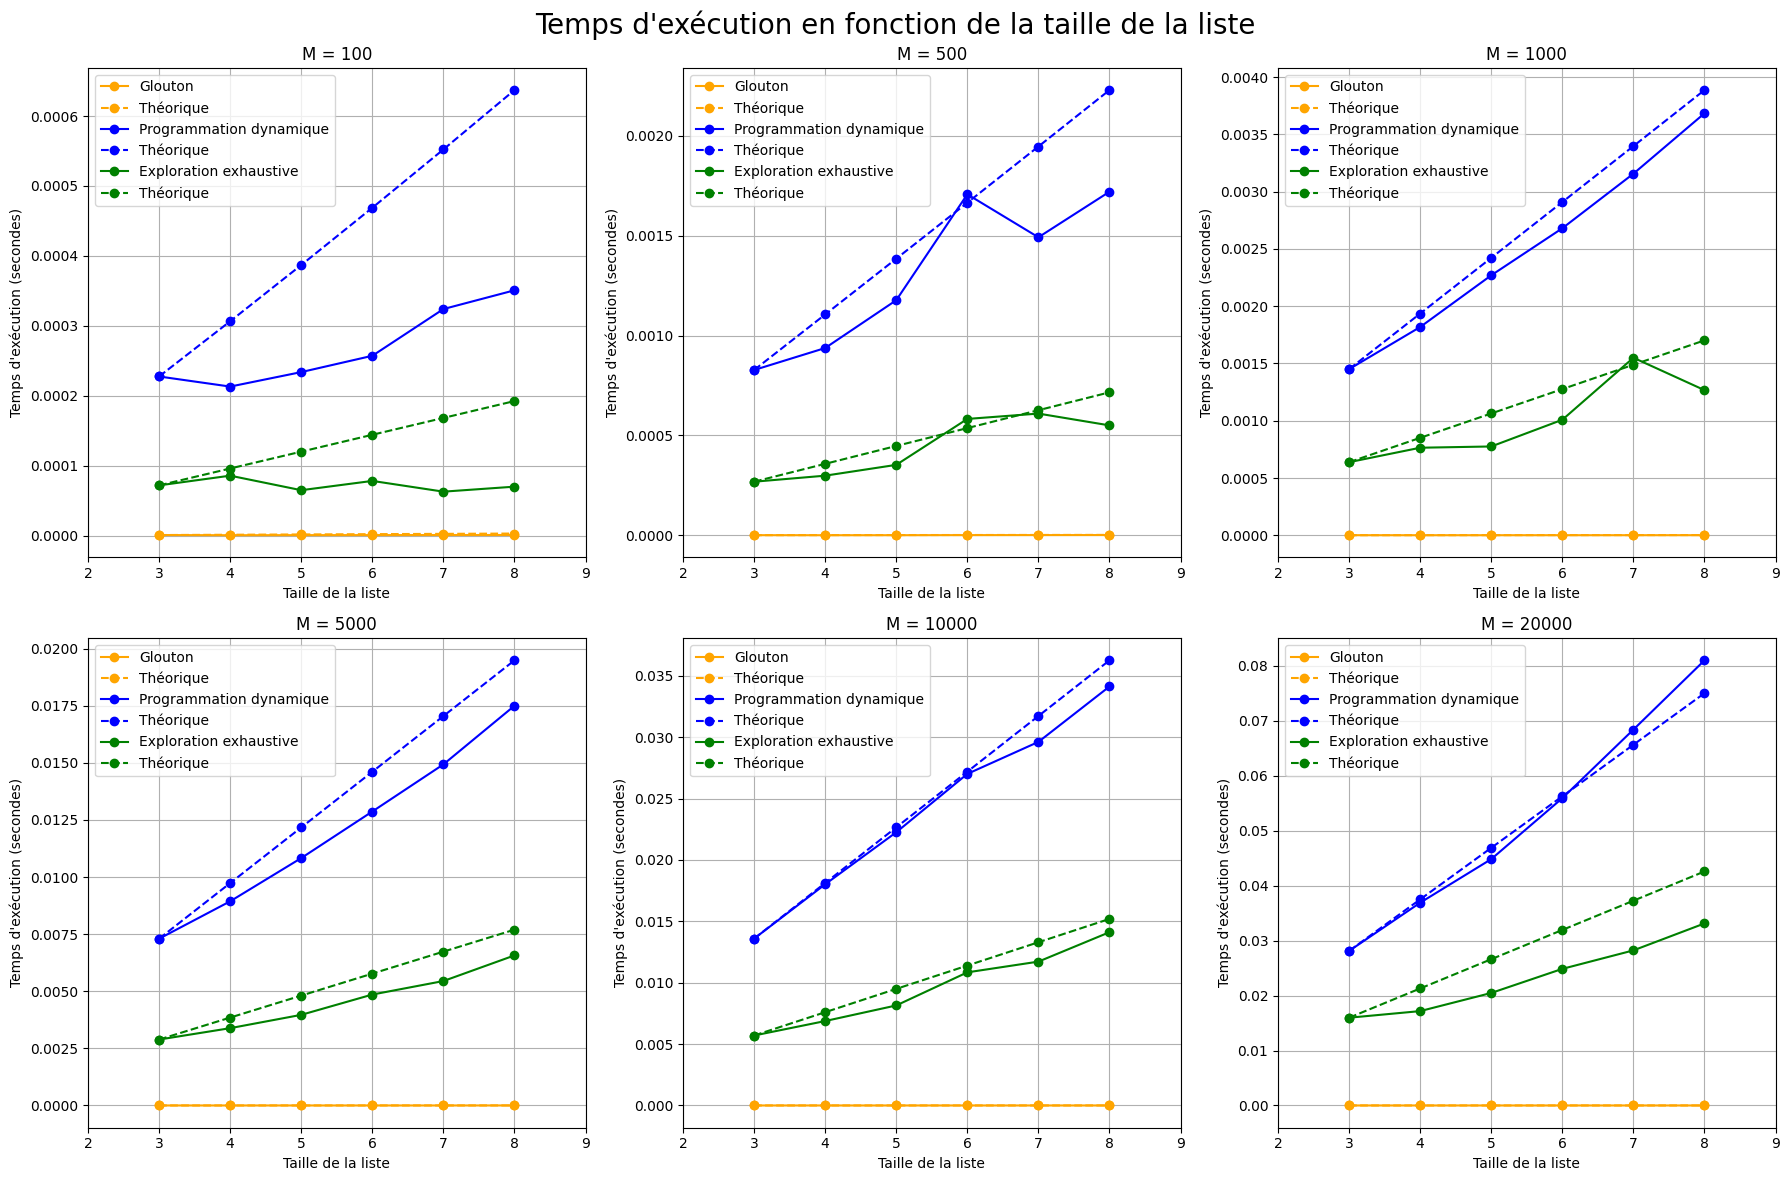

In [132]:
M = [100, 500, 1000, 5000, 10000, 20000]

plt.figure(figsize=(18, 12))
plt.suptitle("Temps d'exécution en fonction de la taille de la liste",
             fontsize=20)
for k in range (len(M)):
    T = {}
    m = M[k]
    for nom_algo, fonction in algorithmes.items():
        for nom_sys, sys in systemes.items():
            T[nom_algo,nom_sys] = mesurer_temps(fonction,sys,m)

    resultats = {
        nom_algo: {nom_sys: T[nom_algo,nom_sys] for nom_sys in systemes}
        for nom_algo in algorithmes
    }


    R = [0,0,0]
    R[0] = [r for r in resultats['Glouton'].values()]
    R[1] = [r for r in resultats['Programmation dynamique'].values()]
    R[2] = [r for r in resultats['Exploration exhaustive'].values()]

    Theo = [0,0,0]
    a = R[0][0]/3
    b = R[1][0]/(3*(3+M[k]))
    c = R[2][0]/(3*M[k])

    Theo[0] = [a*i for i in range(3,9)]
    Theo[1] = [b*i*(i+M[k]) for i in range(3,9)]
    Theo[2] = [c*i*M[k] for i in range(3,9)]

    plt.subplot(2,3,k+1)
    plt.plot([len(S) for S in systemes.values()],R[0], marker='o',label = 'Glouton',color = 'orange')
    plt.plot([len(S) for S in systemes.values()],Theo[0],'--', marker='o',label = 'Théorique',color = 'orange')

    plt.plot([len(S) for S in systemes.values()],R[1], marker='o',label = 'Programmation dynamique',color = 'blue')
    plt.plot([len(S) for S in systemes.values()],Theo[1],'--', marker='o',label = 'Théorique',color = 'blue')

    plt.plot([len(S) for S in systemes.values()],R[2], marker='o',label = 'Exploration exhaustive',color = 'green')
    plt.plot([len(S) for S in systemes.values()],Theo[2],'--', marker='o',label = 'Théorique',color = 'green')

    plt.xlim(2, 9)

    plt.title(f"M = {M[k]}")
    plt.grid()
    plt.xlabel("Taille de la liste")
    plt.ylabel("Temps d'exécution (secondes)")
    plt.legend()
plt.tight_layout()
plt.show()

**Question 4.3 — Synthèse de vos résultats expérimentaux**


On remarque que l'accord entre la complexité théorique et expérimentale augmente avec M (au coeficient multiplicatif près). L'exploration exhaustive semble être plus efficace que la programmation dynamique. L'algorithme glouton ne permet pas d'obtenir un bon résultat ( échec ou rendu de M pièces de 1...) donc il n'est pas comparable en complexité avec les autres. On observe que la complexité temporelle augment avec M, comme prévu par la théorie.  

In [133]:
print("Mesure des temps d'exécution des algorithmes")
S = systemes["Non canonique 2"]
M = 10
for nom, fonction in algorithmes.items():
    print(f"  Algorithme : {nom}")
    t = mesurer_temps(fonction, S, M, nb_repetitions=10)

    print(f"    Temps moyen pour M={M} : {t} secondes")
    print ("   ",fonction(S,M))

Mesure des temps d'exécution des algorithmes
  Algorithme : Glouton
    Temps moyen pour M=10 : 8.491999324178323e-07 secondes
    (True, [10, 0, 0, 0])
  Algorithme : Programmation dynamique
    Temps moyen pour M=10 : 2.487420024408493e-05 secondes
    1
  Algorithme : Exploration exhaustive
    Temps moyen pour M=10 : 5.750799755332992e-06 secondes
    [6, 5, 0]


Avec cet exemple, on observe qu'il n'y a que l'algorithme de programmation dynamique qui permet d'obtenir un résultat satisfaisant (=solution optimale). Mais c'est également l'algorithme le plus lent. Un compromis peut être l'utilisation de l'algorithme avec exploration exhaustive, sauf si l'on souhaite absolument donner priorité à la solution optimale